In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data collecting

In [2]:
data = pd.read_excel("spillway.xlsx")

# Data visualization

In [3]:
data.head(10)

,MONTH,DATE,MAX,MIN,CURRENT,GROSS,DEAD,AVAILABLE,Spillway Discharge,BOTTOM OUTLET,...,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM),Unnamed: 19,HMIS,Inflow cumulative,Unnamed: 22,Power Cumulative (MCM),Total Out flow Cumulative (MCM),Unnamed: 25,Unnamed: 26
0,December,2014-12-29,438.0,370,438.09,722.0,34.0,NaN,NaN,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,December,2014-12-30,438.0,370,438.02,722.0,34.0,NaN,NaN,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,December,2014-12-31,438.0,370,438.00,722.0,34.0,NaN,NaN,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,January,2015-01-01,438.0,370,438.01,722.0,34.0,NaN,9.76,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,January,2015-01-02,438.0,370,437.98,722.0,34.0,NaN,6.06,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,January,2015-01-03,438.0,370,437.98,722.0,34.0,NaN,2.34,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,January,2015-01-04,438.0,370,438.00,722.0,34.0,NaN,2.73,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,January,2015-01-05,438.0,370,437.98,722.0,34.0,NaN,3.03,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,January,2015-01-06,438.0,370,437.97,722.0,34.0,NaN,NaN,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,January,2015-01-07,438.0,370,438.01,722.0,34.0,NaN,NaN,NaN,...,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['MONTH', 'DATE', 'MAX', 'MIN', 'CURRENT', 'GROSS', 'DEAD', 'AVAILABLE',
       'Spillway Discharge', 'BOTTOM OUTLET', 'Sleeve Valve', 'POWER',
       'TOTAL ENERGY GENERATED (GWh)', 'TOTAL OUT FLOW (MCM)',
       'INFLOW \n(MCM)', 'RAIN FALL\nmm',
       'AVAILABLE \nPERCENTAGE ON\nACTIVE  STORAGE', 'SPILLWAY SILL LEVEL',
       'Sleeve Valve Discharge (MCM)', 'Unnamed: 19', 'HMIS',
       'Inflow cumulative', 'Unnamed: 22', 'Power Cumulative (MCM)',
       'Total Out flow Cumulative (MCM)', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [5]:
data['Spillway Discharge'].unique()

array([      nan, 9.760e+00, 6.060e+00, 2.340e+00, 2.730e+00, 3.030e+00,
       1.191e+01, 2.743e+01, 4.590e+00, 8.720e+00, 1.499e+01, 5.230e+00,
       9.820e+00, 4.180e+00, 2.494e+01, 7.120e+00, 5.340e+00, 3.590e+00,
       5.760e+00, 2.200e+00, 3.700e+00, 0.000e+00, 8.140e+00, 8.420e+00,
       3.650e+00, 6.880e+00, 5.240e+00, 2.530e+00, 1.735e+01, 8.430e+00,
       6.460e+00, 2.150e+00, 2.000e-02, 1.000e-03, 2.000e-03, 6.000e-03,
       5.000e-02, 5.830e+00, 6.050e+00, 1.838e+01, 8.160e+00, 2.270e+00,
       5.610e+00, 1.075e+01, 3.337e+01, 3.152e+01, 2.696e+01, 1.348e+01,
       1.560e+01, 1.026e+01, 7.050e+00, 1.059e+01, 4.860e+00, 5.280e+00,
       2.620e+00, 7.000e-01, 2.311e+00, 7.642e+00, 4.418e+00, 1.919e+00,
       1.280e+01, 5.400e+00, 3.300e-01, 7.080e+00, 1.020e+00, 2.520e+00,
       5.700e+00, 2.275e+01, 2.100e+00, 3.770e+00, 3.400e-01, 4.300e+00,
       1.530e+00, 1.000e-02])

# Data preproccesing

## Null values

In [6]:
data.isnull().sum()

MONTH                                         2823
DATE                                             0
MAX                                              0
MIN                                              0
CURRENT                                          6
GROSS                                           59
DEAD                                           537
AVAILABLE                                      584
Spillway Discharge                            2149
BOTTOM OUTLET                                 2476
Sleeve Valve                                  2301
POWER                                           31
TOTAL ENERGY GENERATED (GWh)                    31
TOTAL OUT FLOW (MCM)                            29
INFLOW \n(MCM)                                 654
RAIN FALL\nmm                                  988
AVAILABLE \nPERCENTAGE ON\nACTIVE  STORAGE    1318
SPILLWAY SILL LEVEL                            235
Sleeve Valve Discharge (MCM)                  3103
Unnamed: 19                    

In [7]:
columns_to_delete = ['MONTH', 'MAX', 'MIN', 'AVAILABLE', 'Unnamed: 19', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 22', 'POWER',
       'TOTAL ENERGY GENERATED (GWh)', 'AVAILABLE', 'AVAILABLE \nPERCENTAGE ON\nACTIVE  STORAGE', 'Inflow cumulative', 'Power Cumulative (MCM)',
       'Total Out flow Cumulative (MCM)']

In [8]:
data.drop(columns=columns_to_delete, inplace=True)

In [9]:
data.head()

,DATE,CURRENT,GROSS,DEAD,Spillway Discharge,BOTTOM OUTLET,Sleeve Valve,TOTAL OUT FLOW (MCM),INFLOW \n(MCM),RAIN FALL\nmm,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM),HMIS
0,2014-12-29,438.09,722.0,34.0,NaN,NaN,NaN,0.00,NaN,NaN,430.0,NaN,NaN
1,2014-12-30,438.02,722.0,34.0,NaN,NaN,NaN,0.00,NaN,NaN,430.0,NaN,NaN
2,2014-12-31,438.00,722.0,34.0,NaN,NaN,NaN,0.00,NaN,NaN,430.0,NaN,NaN
3,2015-01-01,438.01,722.0,34.0,9.76,NaN,NaN,21.63,NaN,0,430.0,NaN,NaN
4,2015-01-02,437.98,722.0,34.0,6.06,NaN,NaN,17.21,NaN,0,430.0,NaN,NaN


### Remove null values

In [10]:
data['Spillway Discharge'].fillna(0, inplace=True)

In [11]:
data.head()

,DATE,CURRENT,GROSS,DEAD,Spillway Discharge,BOTTOM OUTLET,Sleeve Valve,TOTAL OUT FLOW (MCM),INFLOW \n(MCM),RAIN FALL\nmm,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM),HMIS
0,2014-12-29,438.09,722.0,34.0,0.00,NaN,NaN,0.00,NaN,NaN,430.0,NaN,NaN
1,2014-12-30,438.02,722.0,34.0,0.00,NaN,NaN,0.00,NaN,NaN,430.0,NaN,NaN
2,2014-12-31,438.00,722.0,34.0,0.00,NaN,NaN,0.00,NaN,NaN,430.0,NaN,NaN
3,2015-01-01,438.01,722.0,34.0,9.76,NaN,NaN,21.63,NaN,0,430.0,NaN,NaN
4,2015-01-02,437.98,722.0,34.0,6.06,NaN,NaN,17.21,NaN,0,430.0,NaN,NaN


In [12]:
data['BOTTOM OUTLET'].fillna(0, inplace=True)

In [13]:
data['Sleeve Valve'].fillna(0, inplace=True)

In [14]:
data.head()

,DATE,CURRENT,GROSS,DEAD,Spillway Discharge,BOTTOM OUTLET,Sleeve Valve,TOTAL OUT FLOW (MCM),INFLOW \n(MCM),RAIN FALL\nmm,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM),HMIS
0,2014-12-29,438.09,722.0,34.0,0.00,0.0,0.0,0.00,NaN,NaN,430.0,NaN,NaN
1,2014-12-30,438.02,722.0,34.0,0.00,0.0,0.0,0.00,NaN,NaN,430.0,NaN,NaN
2,2014-12-31,438.00,722.0,34.0,0.00,0.0,0.0,0.00,NaN,NaN,430.0,NaN,NaN
3,2015-01-01,438.01,722.0,34.0,9.76,0.0,0.0,21.63,NaN,0,430.0,NaN,NaN
4,2015-01-02,437.98,722.0,34.0,6.06,0.0,0.0,17.21,NaN,0,430.0,NaN,NaN


In [15]:
data['INFLOW \n(MCM)'].fillna(0, inplace=True)

In [16]:
data['RAIN FALL\nmm'].fillna(0, inplace=True)

In [17]:
data['Sleeve Valve Discharge (MCM)'].fillna(0, inplace=True)

In [18]:
data['HMIS'].fillna(0, inplace=True)

In [19]:
data.head()

,DATE,CURRENT,GROSS,DEAD,Spillway Discharge,BOTTOM OUTLET,Sleeve Valve,TOTAL OUT FLOW (MCM),INFLOW \n(MCM),RAIN FALL\nmm,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM),HMIS
0,2014-12-29,438.09,722.0,34.0,0.00,0.0,0.0,0.00,0.0,0,430.0,0.0,0
1,2014-12-30,438.02,722.0,34.0,0.00,0.0,0.0,0.00,0.0,0,430.0,0.0,0
2,2014-12-31,438.00,722.0,34.0,0.00,0.0,0.0,0.00,0.0,0,430.0,0.0,0
3,2015-01-01,438.01,722.0,34.0,9.76,0.0,0.0,21.63,0.0,0,430.0,0.0,0
4,2015-01-02,437.98,722.0,34.0,6.06,0.0,0.0,17.21,0.0,0,430.0,0.0,0


In [20]:
data.dropna(inplace=True)

In [21]:
data.isnull().sum()

DATE                            0
CURRENT                         0
GROSS                           0
DEAD                            0
Spillway Discharge              0
BOTTOM OUTLET                   0
Sleeve Valve                    0
TOTAL OUT FLOW (MCM)            0
INFLOW \n(MCM)                  0
RAIN FALL\nmm                   0
SPILLWAY SILL LEVEL             0
Sleeve Valve Discharge (MCM)    0
HMIS                            0
dtype: int64

In [22]:
data["HMIS"].unique()

array([0, 430.274, 430.30899999999997, 430.294, 430.231, 430.198, 430.22,
       430.243, 430.25, 430.264, 430.201, 430.133, 430.104, 430.073,
       430.065, 430.091, 430.085, 430.09000000000003, 430.027, 434.466,
       434.299, 433.903, 433.526, 433.273, 432.972, 432.63, 432.249,
       431.895, 431.609, 431.368, 431.099, 424.599, 429.435, 430.052,
       430.666, 431.172, 431.777, 432.304, 432.436, 432.67, 410, 435.071,
       435.003, 434.852, 434.742, 434.661, 434.574, 434.427, 434.204,
       433.98, 433.807, 433.767, 433.70799999999997, 433.702, 433.72,
       433.696, 433.564, 433.249, 433.02, 433.094, 433.14300000000003,
       433.145, 433.133, 433.489, 433.558, 433.485, 433.425, 433.338,
       433.098, 432.897, 432.75, 432.557, 432.4, 432.298, 432.16, 432.028,
       432.016, 432.021, 431.981, 431.989, 432.006, 432.017, 432.025,
       432.036, 432.141, 432.234, 432.224, 432.154, 432.012, 431.844,
       431.727, 431.614, 424.977, 424.814, 424.629, 424.396, 424.257,
      

In [23]:
data

,DATE,CURRENT,GROSS,DEAD,Spillway Discharge,BOTTOM OUTLET,Sleeve Valve,TOTAL OUT FLOW (MCM),INFLOW \n(MCM),RAIN FALL\nmm,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM),HMIS
0,2014-12-29,438.09,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0
1,2014-12-30,438.02,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0
2,2014-12-31,438.00,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0
3,2015-01-01,438.01,722.0,34.0,9.76,0.0,0.000,21.630,0.000,0,430.0,0.0,0
4,2015-01-02,437.98,722.0,34.0,6.06,0.0,0.000,17.210,0.000,0,430.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,2023-04-02,417.84,722.0,34.0,0.00,0.0,0.057,6.698,1.758,15.3,484.0,0.0,0
3017,2023-04-03,417.48,722.0,34.0,0.00,0.0,0.057,7.006,1.506,0.9,485.0,0.0,0
3018,2023-04-04,417.08,722.0,34.0,0.00,0.0,0.057,4.665,2.375,14.5,486.0,0.0,0
3019,2023-04-05,416.91,722.0,34.0,0.00,0.0,0.057,4.408,1.578,0,487.0,0.0,0


In [24]:
date_column = 'DATE'  # Replace with the actual column name

# Convert the date column to a datetime object
data[date_column] = pd.to_datetime(data[date_column])

# Extract day, month, and year using the dt accessor
data['Day'] = data[date_column].dt.day
data['Month'] = data[date_column].dt.month
data['Year'] = data[date_column].dt.year

In [25]:
data

,DATE,CURRENT,GROSS,DEAD,Spillway Discharge,BOTTOM OUTLET,Sleeve Valve,TOTAL OUT FLOW (MCM),INFLOW \n(MCM),RAIN FALL\nmm,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM),HMIS,Day,Month,Year
0,2014-12-29,438.09,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0,29,12,2014
1,2014-12-30,438.02,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0,30,12,2014
2,2014-12-31,438.00,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0,31,12,2014
3,2015-01-01,438.01,722.0,34.0,9.76,0.0,0.000,21.630,0.000,0,430.0,0.0,0,1,1,2015
4,2015-01-02,437.98,722.0,34.0,6.06,0.0,0.000,17.210,0.000,0,430.0,0.0,0,2,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,2023-04-02,417.84,722.0,34.0,0.00,0.0,0.057,6.698,1.758,15.3,484.0,0.0,0,2,4,2023
3017,2023-04-03,417.48,722.0,34.0,0.00,0.0,0.057,7.006,1.506,0.9,485.0,0.0,0,3,4,2023
3018,2023-04-04,417.08,722.0,34.0,0.00,0.0,0.057,4.665,2.375,14.5,486.0,0.0,0,4,4,2023
3019,2023-04-05,416.91,722.0,34.0,0.00,0.0,0.057,4.408,1.578,0,487.0,0.0,0,5,4,2023


In [26]:
data.drop(columns=['DATE'], inplace=True)

In [27]:
data

,CURRENT,GROSS,DEAD,Spillway Discharge,BOTTOM OUTLET,Sleeve Valve,TOTAL OUT FLOW (MCM),INFLOW \n(MCM),RAIN FALL\nmm,SPILLWAY SILL LEVEL,Sleeve Valve Discharge (MCM),HMIS,Day,Month,Year
0,438.09,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0,29,12,2014
1,438.02,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0,30,12,2014
2,438.00,722.0,34.0,0.00,0.0,0.000,0.000,0.000,0,430.0,0.0,0,31,12,2014
3,438.01,722.0,34.0,9.76,0.0,0.000,21.630,0.000,0,430.0,0.0,0,1,1,2015
4,437.98,722.0,34.0,6.06,0.0,0.000,17.210,0.000,0,430.0,0.0,0,2,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,417.84,722.0,34.0,0.00,0.0,0.057,6.698,1.758,15.3,484.0,0.0,0,2,4,2023
3017,417.48,722.0,34.0,0.00,0.0,0.057,7.006,1.506,0.9,485.0,0.0,0,3,4,2023
3018,417.08,722.0,34.0,0.00,0.0,0.057,4.665,2.375,14.5,486.0,0.0,0,4,4,2023
3019,416.91,722.0,34.0,0.00,0.0,0.057,4.408,1.578,0,487.0,0.0,0,5,4,2023


In [28]:
import pickle

In [29]:
pickle.dump(data,open('data_without_cluster.pickle','wb'))

# Spillway Discharge using Water Level

In [30]:
y_data = data["Spillway Discharge"]

In [31]:
x_data = data['CURRENT']

In [32]:
y_data

0       0.00
1       0.00
2       0.00
3       9.76
4       6.06
        ... 
3016    0.00
3017    0.00
3018    0.00
3019    0.00
3020    0.00
Name: Spillway Discharge, Length: 2484, dtype: float64

In [33]:
x_data

0       438.09
1       438.02
2       438.00
3       438.01
4       437.98
         ...  
3016    417.84
3017    417.48
3018    417.08
3019    416.91
3020    416.70
Name: CURRENT, Length: 2484, dtype: float64

In [34]:
X = x_data.values.reshape(-1, 1)

In [35]:
y = y_data.values.reshape(-1, 1)

In [36]:
X.shape

(2484, 1)

In [37]:
y.shape

(2484, 1)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
X_test

array([[410.96],
       [437.87],
       [434.81],
       [419.28],
       [425.8 ],
       [418.62],
       [427.88],
       [429.67],
       [437.96],
       [424.64],
       [427.94],
       [412.62],
       [427.83],
       [435.12],
       [434.7 ],
       [411.46],
       [434.86],
       [407.13],
       [412.04],
       [410.87],
       [419.87],
       [428.81],
       [438.04],
       [434.7 ],
       [435.33],
       [419.03],
       [424.33],
       [410.82],
       [406.84],
       [427.01],
       [428.  ],
       [434.56],
       [430.23],
       [428.21],
       [428.72],
       [432.25],
       [429.16],
       [421.47],
       [423.79],
       [428.68],
       [428.17],
       [432.34],
       [427.98],
       [401.54],
       [425.99],
       [435.92],
       [430.51],
       [432.49],
       [432.01],
       [438.02],
       [426.76],
       [429.72],
       [422.18],
       [429.91],
       [437.71],
       [412.8 ],
       [428.62],
       [406.87],
       [416.32

In [45]:
y_pred = model.predict(X_test)

In [46]:
y_pred

array([[-2.32668905e-01],
       [ 5.27177220e-01],
       [ 4.40773312e-01],
       [ 2.25936540e-03],
       [ 1.86361808e-01],
       [-1.63767714e-02],
       [ 2.45093876e-01],
       [ 2.95637338e-01],
       [ 5.29718511e-01],
       [ 1.53607386e-01],
       [ 2.46788070e-01],
       [-1.85796197e-01],
       [ 2.43682047e-01],
       [ 4.49526649e-01],
       [ 4.37667290e-01],
       [-2.18550620e-01],
       [ 4.42185141e-01],
       [-3.40814972e-01],
       [-2.02173408e-01],
       [-2.35210196e-01],
       [ 1.89189423e-02],
       [ 2.71353887e-01],
       [ 5.31977437e-01],
       [ 4.37667290e-01],
       [ 4.55456329e-01],
       [-4.79977734e-03],
       [ 1.44854049e-01],
       [-2.36622025e-01],
       [-3.49003577e-01],
       [ 2.20528059e-01],
       [ 2.48482264e-01],
       [ 4.33714170e-01],
       [ 3.11449817e-01],
       [ 2.54411944e-01],
       [ 2.68812595e-01],
       [ 3.68487691e-01],
       [ 2.81236687e-01],
       [ 6.40974558e-02],
       [ 1.2

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.4702687413917928
Mean Absolute Error: 0.4799945408207574
R-squared: 0.028093973949911533


In [49]:
import matplotlib.pyplot as plt

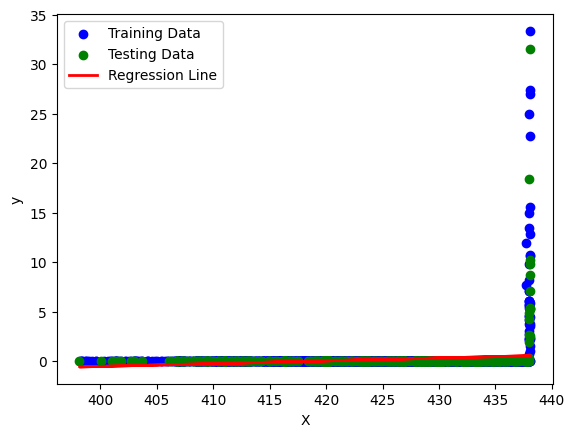

In [50]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Gate opening condition using water level

In [ ]:
X = data['CURRENT'].values.reshape(-1, 1)
y = data['Cluster'].values.reshape(-1, 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

In [ ]:
print("Gate closed : 0")
print("Gate 1 & 2 : 4")
print("Gate 3 & 4 : 1")
print("Gate 5 & 6 : 3")
print("Gate 7 & 8 : 2")

In [ ]:
print(clf.predict([["438.07"]]))

# Accuracy of prediction of gates opening with dates

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)